In [2]:
import pandas as pd
import numpy as np

# Load the data from the Excel file
data_sheet = pd.read_excel('Global_Financial_Development_Database.xlsx')

# Calculate the correlation matrix to find the best pairs of columns for linear regression
numeric_data = data_sheet.select_dtypes(include=[np.number])

# Calculate the correlation matrix to find the best pairs of columns for linear regression
correlation_matrix = numeric_data.corr()

# Select the upper triangle of the correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find the pairs of columns with the highest correlation coefficients
high_correlation_pairs = upper_triangle.stack().sort_values(ascending=False)

# Display the top 10 pairs with the highest correlation coefficients
top_10_pairs = high_correlation_pairs.head(70)
print(top_10_pairs)

# Select the best pair for linear regression
best_pair = top_10_pairs.index[0]
column1, column2 = best_pair

print(f"Best columns for linear regression: {column1} and {column2}")


di08  oi02    0.999413
dm07  oi09    0.998623
ai01  ai25    0.983578
ei05  ei09    0.982317
ai03  ai04    0.971387
                ...   
di01  di08    0.737695
      oi02    0.737053
di03  di12    0.735419
oi08  oi09    0.734049
dm12  oi08    0.732811
Length: 70, dtype: float64
Best columns for linear regression: di08 and oi02


In [3]:
financial_system_deposits = data_sheet['di08']
bank_deposits = data_sheet['oi02']

# Drop rows with missing values
data = pd.DataFrame({'di08': financial_system_deposits, 
                     'oi02': bank_deposits}).dropna()

In [4]:
data.head()

,di08,oi02
26,38.81721,38.81721
27,45.31042,45.31042
28,44.64297,44.64297
29,46.91856,46.91856
30,49.63587,49.63587


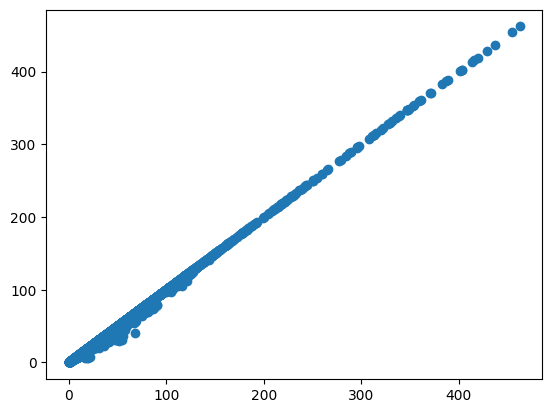

In [5]:
import matplotlib.pyplot as plt
plt.scatter(data['di08'], data['oi02'])

In [8]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

model.fit(data[['di08']], data[['oi02']])
model.score(data[['di08']], data[['oi02']])



0.9988262088620254

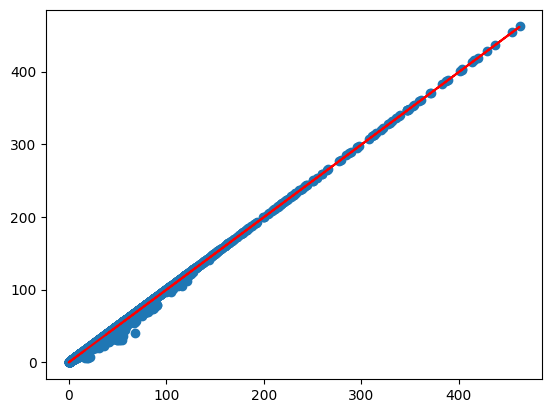

In [68]:
plt.scatter(data['di08'], data['oi02'])
plt.plot(data['di08'], predictions, color='red')

